Miembros del grupo:
Ziteng Huang y Lubin Ye

# Práctica 4: Procesamiento del Lenguaje Natural

__Fecha de entrega: 14 de mayo de 2024__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [14]:
RANDOM_STATE = 1234

In [15]:
import nltk
import re
import numpy as np
import csv
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import Counter

# 1) Carga del conjunto de datos

El fichero `spam.csv` contiene mensajes SMS etiquetados como spam or ham (legítimo).

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 60% para entrenamiento, 20% para validación y el 20% restante para test. Comprueba que la distribución de los ejemplos en las particiones es similar. 

In [16]:
# Cargar dataset -> encoding="latin1"

def load_data():
    corpus = []
    labels = []
    with open('spam.csv', 'r', encoding="latin1") as f:
        reader = csv.reader(f)
        reader.__next__()
        for row in reader:
            corpus.append(row[1])
            labels.append(row[0])

    corpus_df = pd.DataFrame({'Document': corpus, 
                        'Category': labels})

    return corpus, labels, corpus_df


corpus, labels, corpus_df = load_data()

corpus_df


,Document,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [17]:
# Contar palabras más frecuentes -> palabras sin significado

def contar_palabras(corpus):
    lista_palabras = []
    for text in corpus:
        lista_palabras.extend(text.split(" "))

    counter = Counter(lista_palabras)
    palabras_mas_comunes = counter.most_common()

    # Palabras más comunes
    print("Palabras más comunes:")
    for palabra, frecuencia in palabras_mas_comunes:
        print(f"{palabra}: {frecuencia}")

contar_palabras(corpus)

Palabras más comunes:
to: 2134
you: 1622
I: 1466
a: 1327
the: 1197
and: 857
in: 798
is: 781
i: 742
u: 692
for: 644
my: 628
: 628
of: 591
your: 560
me: 557
on: 487
have: 474
2: 453
that: 421
it: 396
are: 396
call: 376
or: 373
be: 362
at: 359
with: 349
not: 340
will: 330
get: 326
can: 304
U: 299
so: 294
ur: 293
I'm: 286
but: 282
&lt;#&gt;: 276
You: 263
from: 256
4: 249
do: 243
up: 241
just: 236
if: 235
.: 235
go: 234
when: 233
know: 224
this: 223
like: 222
we: 221
all: 216
out: 207
got: 204
was: 200
come: 198
now: 190
?: 187
am: 186
...: 163
want: 157
Call: 155
by: 155
time: 154
about: 150
send: 150
only: 147
then: 146
going: 142
what: 142
need: 141
n: 137
I'll: 137
How: 137
still: 134
as: 133
If: 133
one: 132
But: 131
its: 128
he: 127
our: 126
No: 126
text: 126
no: 124
been: 120
Just: 119
We: 119
there: 118
So: 118
some: 114
love: 114
good: 114
think: 113
has: 113
Do: 113
see: 113
r: 113
how: 111
back: 111
any: 111
don't: 110
an: 108
home: 107
&: 107
Ì_: 105
tell: 104
Your: 104
take: 10

In [18]:
wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lubin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Borrar palabras sin signifcado (stop words)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs',
       ..., 'pity mood soany suggestions',
       'guy bitching acted like id interested buying something else next week gave us free',
       'rofl true name'], dtype='<U516')

In [20]:
# Volvemos a contar ahora las palabras más comunes después de normalizar

contar_palabras(norm_corpus)

Palabras más comunes:
u: 1143
call: 579
im: 474
get: 390
ur: 384
dont: 290
go: 282
free: 278
ok: 277
ltgt: 276
know: 257
like: 242
ill: 241
got: 239
good: 234
come: 226
day: 211
time: 208
love: 195
want: 192
send: 190
text: 189
going: 171
one: 170
need: 166
txt: 164
home: 162
lor: 160
see: 156
sorry: 156
r: 154
still: 153
stop: 153
back: 152
n: 144
reply: 144
today: 141
mobile: 139
tell: 137
new: 136
well: 134
later: 134
hi: 133
think: 132
da: 132
please: 130
take: 126
phone: 126
cant: 125
week: 116
claim: 113
much: 113
night: 113
dear: 113
oh: 112
great: 111
hey: 111
pls: 109
happy: 106
hope: 103
make: 101
thats: 101
way: 101
give: 100
work: 99
wat: 96
number: 94
prize: 92
right: 92
yes: 92
say: 91
already: 90
tomorrow: 90
ask: 88
really: 86
yeah: 86
said: 86
e: 85
k: 85
b: 84
c: 83
message: 83
msg: 83
didnt: 83
amp: 82
p: 79
meet: 78
babe: 78
last: 78
morning: 77
life: 77
ive: 76
miss: 76
thanks: 76
would: 76
cos: 76
cash: 74
lol: 73
anything: 73
find: 73
every: 73
win: 72
nokia: 72


In [21]:
# Split data en training, validacion y test

def split_data(corpus, labels):
    
    corpus_train, corpus_val_test, labels_train, labels_val_test = train_test_split(corpus, labels, test_size=0.4, random_state=RANDOM_STATE)
    corpus_val, corpus_test, labels_val, labels_test = train_test_split(corpus_val_test, labels_val_test, test_size=0.5, random_state=RANDOM_STATE)

    corpus_df_train = pd.DataFrame({'Document': corpus_train, 
                           'Category': labels_train})
    
    corpus_df_val = pd.DataFrame({'Document': corpus_val,
                                    'Category': labels_val})
                                    
    corpus_df_test = pd.DataFrame({'Document': corpus_test,
                                    'Category': labels_test})

    return corpus_df_train, corpus_df_val, corpus_df_test


corpus_df_train, corpus_df_val, corpus_df_test = split_data(norm_corpus, labels)
corpus_df_train

,Document,Category
0,bring home wendy,ham
1,checked heading drop stuff,ham
2,ltdecimalgt common car better buy china asia f...,ham
3,alreadysabarish asked go,ham
4,sarcasm nt scarcasim,ham
...,...,...
3338,yes baby study positions kama sutra,ham
3339,great day beautiful one,ham
3340,ok,ham
3341,ya even cookies jelly,ham


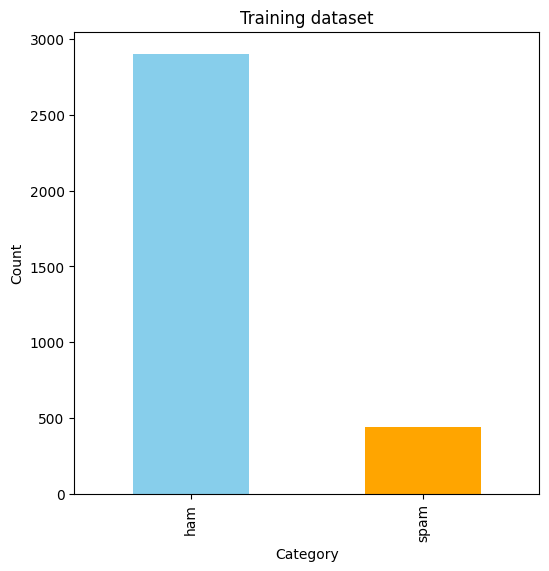

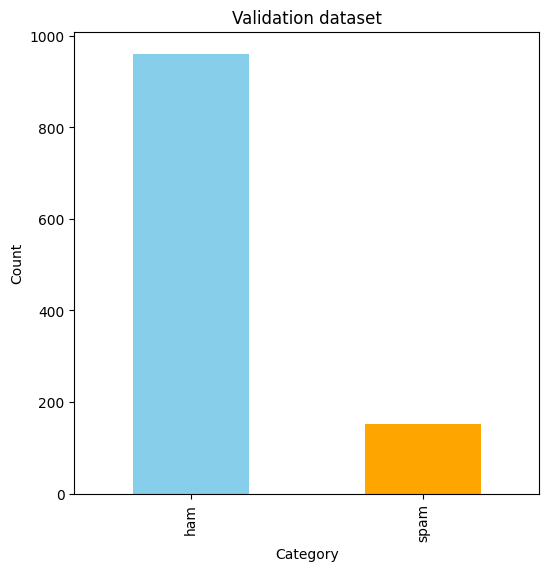

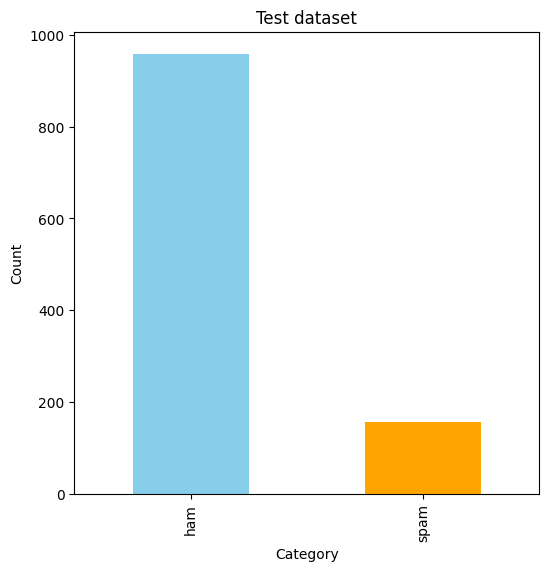

In [22]:
import matplotlib.pyplot as plt

def plot_class_distribution(corpus_df, title):
    plt.figure(figsize=(6,6))
    corpus_df['Category'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution(corpus_df_train, "Training dataset")
plot_class_distribution(corpus_df_val, "Validation dataset")
plot_class_distribution(corpus_df_test, "Test dataset")


RESPUESTA:

Se observa que las palabras más frecuentes son "to", "you" e "I". Sin embargo, dado que estas palabras son bastante genéricas y no contribuyen significativamente a la clasificación de mensajes como spam o no spam, normalizar el corpus podría mejorar la capacidad del modelo para identificar palabras clave y patrones relevantes, ya que así eliminamos ruido y palabras genéricas.

Después de la normalización, las palabras más destacadas son "u", "call" e "im". Esto sugiere que estas palabras podrían ser más relevantes para la clasificación de mensajes. Por ejemplo, "u" es una abreviatura común de "you", "call" puede estar asociada con llamadas telefónicas y "im" podría ser una contracción de "I'm" (estoy) utilizada en mensajes informales.

Comprobamos que la distribución de los datasets es proporcional la disribución de las clases proporcionada en el .csv

# 2) Representación como bolsa de palabras

Elige justificadamente una representación de bolsa de palabras y aplícala.
Muestra un ejemplo antes y después de aplicar la representación. Explica los cambios.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_features(corpus):
    tv = TfidfVectorizer()
    tv_matrix = tv.fit_transform(corpus)
    tv_matrix = tv_matrix.toarray()

    vocab = tv.get_feature_names_out()
    return pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

# Ejemplo de frecuencia de las palabras de los primeros 5 documentos
print(get_tfidf_features(norm_corpus[:5]))

# Ejemplo de frecuencia de todos los documentos
print(get_tfidf_features(norm_corpus))

   already  amore  apply  around  available  buffet  bugis  cine  comp  crazy  \
0     0.00   0.27    0.0    0.00       0.27    0.27   0.27  0.27   0.0   0.27   
1     0.00   0.00    0.0    0.00       0.00    0.00   0.00  0.00   0.0   0.00   
2     0.00   0.00    0.2    0.00       0.00    0.00   0.00  0.00   0.2   0.00   
3     0.35   0.00    0.0    0.00       0.00    0.00   0.00  0.00   0.0   0.00   
4     0.00   0.00    0.0    0.35       0.00    0.00   0.00  0.00   0.0   0.00   

   ...  think  though  tkts  txt   usf   wat   wif  win  wkly  world  
0  ...   0.00    0.00   0.0  0.0  0.00  0.27  0.00  0.0   0.0   0.27  
1  ...   0.00    0.00   0.0  0.0  0.00  0.00  0.45  0.0   0.0   0.00  
2  ...   0.00    0.00   0.2  0.2  0.00  0.00  0.00  0.2   0.2   0.00  
3  ...   0.00    0.00   0.0  0.0  0.00  0.00  0.00  0.0   0.0   0.00  
4  ...   0.35    0.35   0.0  0.0  0.35  0.00  0.00  0.0   0.0   0.00  

[5 rows x 50 columns]
       aa  aah  aaniye  aaooooright  aathilove  aathiwhere   ab 

RESPUESTA:

Hemos empleado la representación de word-bag utilizando el método del TFIDF. Inicialmente, lo aplicamos a los primeros cinco documentos del corpus para obtener las frecuencias de cada palabra en relación con esos cinco documentos. Esta aproximación nos permite examinar cómo se distribuyen las palabras clave en un conjunto más reducido de textos antes de generalizar a todo el corpus. 

Luego, extrapolamos esta técnica al conjunto completo de documentos, incluyendo todas las palabras presentes en ellos. Esto nos proporciona una tabla exhaustiva que refleja las frecuencias de todas las palabras en cada documento. Sin embargo, debido a la inmensidad de la representación tabular, es posible que no todas las frecuencias sean visibles a simple vista. Aunque, idealmente, estas frecuencias deberían estar en el rango de 0 a 1, lo que nos permite tener una idea de la importancia relativa de cada palabra en cada documento.

Comparado con el método de búsqueda de palabras más frecuentes en todo el corpus, la representación TFIDF nos ofrece una perspectiva más detallada y precisa. Esta técnica nos permite examinar datos más relevantes y nos brinda una comprensión más clara de cómo se distribuyen las palabras clave a lo largo de los documentos.

# 3) Aplica 3 algoritmos de aprendizaje automático para resolver la tarea

Justifica porqué los has elegido.
Ajusta los modelos respecto a un hiperparámetro que consideres oportuno. Justifica tu elección.
Explica los resultados obtenidos.

In [24]:
# Árbol de decisión 

from sklearn import tree
import numpy as np

vectorizer = TfidfVectorizer()
train_preprocessed = vectorizer.fit_transform(corpus_df_train["Document"]).toarray()
test_preprocessed = vectorizer.transform(corpus_df_test["Document"]).toarray()

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(criterion="entropy")

tree_classifier.fit(train_preprocessed, corpus_df_train["Category"])

tree_train_predictions = tree_classifier.predict(train_preprocessed)
tree_test_predictions = tree_classifier.predict(test_preprocessed)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == corpus_df_train["Category"]))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == corpus_df_test["Category"]))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.9452914798206278


In [25]:
# k Vecinos Más Cercanos (k-NN)

from sklearn import neighbors

for k in range(1, 10):
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_preprocessed, corpus_df_train["Category"])

    knn_train_predictions = knn_classifier.predict(train_preprocessed)
    knn_test_predictions = knn_classifier.predict(test_preprocessed)

    print(f"k-NN con k={k}, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == corpus_df_train["Category"]))
    print(f"k-NN con k={k}, porcentaje de aciertos en test:", np.mean(knn_test_predictions == corpus_df_test["Category"]))

k-NN con k=1, porcentaje de aciertos en entrenamiento: 1.0
k-NN con k=1, porcentaje de aciertos en test: 0.9452914798206278
k-NN con k=2, porcentaje de aciertos en entrenamiento: 0.9407717618905175
k-NN con k=2, porcentaje de aciertos en test: 0.9174887892376682
k-NN con k=3, porcentaje de aciertos en entrenamiento: 0.9410708944062219
k-NN con k=3, porcentaje de aciertos en test: 0.9174887892376682
k-NN con k=4, porcentaje de aciertos en entrenamiento: 0.9210290158540233
k-NN con k=4, porcentaje de aciertos en test: 0.9040358744394619
k-NN con k=5, porcentaje de aciertos en entrenamiento: 0.9210290158540233
k-NN con k=5, porcentaje de aciertos en test: 0.9040358744394619
k-NN con k=6, porcentaje de aciertos en entrenamiento: 0.909661980257254
k-NN con k=6, porcentaje de aciertos en test: 0.8932735426008969
k-NN con k=7, porcentaje de aciertos en entrenamiento: 0.909661980257254
k-NN con k=7, porcentaje de aciertos en test: 0.8932735426008969
k-NN con k=8, porcentaje de aciertos en entr

In [26]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, corpus_df_train["Category"])

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == corpus_df_train["Category"]))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == corpus_df_test["Category"]))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9754711337122345
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9533632286995516


RESPUESTA:

Establecemos criterion='entropy' en el clasificador DecisionTreeClassifier. La entropía es una medida de incertidumbre en un conjunto de datos. En el contexto del árbol de decisión, la entropía se utiliza para calcular la ganancia de información en cada división del árbol. La ganancia de información es la reducción en la entropía (o la incertidumbre) que se obtiene al dividir un conjunto de datos en función de un atributo específico.

Al ajustar el árbol de decisión utilizando la entropía, el modelo buscará dividir el conjunto de datos en los puntos que minimicen la entropía, es decir, que maximicen la ganancia de información. Esto puede conducir a divisiones más informativas y, en algunos casos, a un mejor rendimiento del modelo.

# 4) Construye redes neuronales con Keras con distintas maneras de usar word embeddings

Justifica tus decisiones y explica los resultados obtenidos.

# 5) Aplica los modelos construidos a los datos de test y compáralos.

Calcula las métricas de recall, precisión y f1.
Discute cual es el mejor modelo y cual es peor y porqué.